<br>
<br>
**<font size=7><center>Predicting Default Rates for Lending Club</center></font>**


<font size=5>Devon Luongo</font> <br>
<font size=4>Harvard University</font> <br>
<font size=3>deluongo@gmail.com</font> <br>

<font size=5>Ben Yuen</font> <br>
<font size=4>Harvard University</font> <br>
<font size=3></font> <br>

<font size=5>Bryn Clark</font> <br>
<font size=4>Harvard University</font> <br>
<font size=3></font> <br>

<font size=5>Ankit Agarwal</font> <br>
<font size=4>Harvard University</font> <br>
<font size=3></font> <br>

**<font size=4><center>Abstract</center></font>**

<center>**!!(Insert Abstract)!!**</center>

# I. Introduction

Lending Club is an online marketplace that fascilitates the lending money to individuals or businesses through online services that match lenders directly with borrowers. This practice is called Peer-to-Peer (P2P) Lending. With an A+ BBB rating, Lending Club offers an attractive alternative to bonds for steady investment income. Lending Club also states that borrowers are able to reduce their loans by an average of 30%.

"Since peer-to-peer lending companies offering these services operate entirely online, they can run with lower overhead and provide the service more cheaply than traditional financial institutions. As a result, lenders often earn higher returns compared to savings and investment products offered by banks, while borrowers can borrow money at lower interest rates, even after the P2P lending company has taken a fee for providing the match-making platform and credit checking the borrower."

The downside to Lending Club however, is that most peer-to-peer loans are unsecured personal loans, meaning lenders incur a higher risk than comparable steady income investments like Treasury Bonds. Therefore, the investment quality of each loan depends largly on three factors: the expected return, the level of risk aversion, and the risk incurred. The first factor is built into the contract of the loan, and the second factor is personal preference. Therefore, the primary variable that that investors must identify when compoaring P2P Lending with other investment opportunities is the default risk for each loan. 

For this reason, Lending Club offers lenders a dataset containing a comprehensive list of features that can be employed to make better lending decisions. Detailed information for every loan have been issued by Lending Club from 2007 to 2015. Among**!!(Insert Num Predictors)!!** features or predictors in total, the dataset includes a borrower’s annual incomes, zip codes, revolving balances, and purpose for borrowing.

Our objective was to build on similar projects conducted in recent years to construct a model for default risk to help lenders decrease the risk they occur when lending. We trained and tested a range of models in an attempt to identify the best performing model. Additionally, we constructed a cost based model aimed at maximizing Lending Clubs overhead.



# II. Related Work

**!!(Rewrite After Models Complete)!!** 
Prior projects like **!!("Predicting borrowers chance of defaulting on credit loans" [1])!!** have set great examples of applying machine learning to improve loan default prediction in a Kaggle competition, and authors for**!!("Predicting Probability of Loan Default" [2])!!**  have shown that Random Forest appeared to be the best performing model on the Kaggle data. 

However, despite the early success using Random Forest for default prediction, real-world records often behaves differently from curated data, and a later study **!!("Peer Lending Risk Predictor" [3])!!** presented that a modified Logistic Regression model could outperform SVM, Naive Bayes, and even Random Forest on Lending Club data. 

The fact that Logistic Regression performance could be immensely improved by simply adding penalty factor on misclassification gave rise to our interest in fine tuning other not-yet optimized models, in particular, SVM and Naive Bayes, to continue the search for a better predictive model in the realm of loan default. Besides the difference in types of model that they focus on, the prior studies only used the out-of-the-box dataset from Kaggle or
Lending Club, but research like **!!("The sensitivity of the loss given default rate to systematic risk" [4])!!** has shown the linkage between default rate and macroeconomic factors, so we have decided to add in census data, with info like regional median income, to train our models on a more holistic set of features.

# III. Data

### Loading

<font size=3><u> Libraries:</u> </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy
%matplotlib inline


#new imports for milestone 4
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import itertools
from sklearn.cross_validation import train_test_split

In [2]:
path = "/home/ankit/anaconda2/pkgs/basemap-1.0.7-np111py27_0/lib/python2.7/site-packages/mpl_toolkits/basemap/data/"

### Data Cleaning

Some of the data files have fields that contain NAs for older time periods. In order to collapse the data sets into one file, all numerical data will be stored in float fields (integer fields do not support NA missing values). To do this, we first define a conversion dictionary that stores the numeric fields with lookups to the *float* data type.

In [3]:
convert_float = dict([s, float] for s in
                     ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
                      'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',                      
                      'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
                      'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                      'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                      'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
                      'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
                      'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
                      'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                      'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
                      'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                      'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
                      'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
                      'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                      'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                      'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
                      'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
                      'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

We also define a dictionary of string fields, to handle situations where the inferred data type might be numeric even though the field should be read in as a string/object.

In [4]:
convert_str = dict([s, str] for s in
                    ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
                     'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 
                     'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 
                     'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
                     'policy_code', 'application_type', 'verification_status_joint'])

We read the input data from the CSV data files using pandas *read_csv*. There is a blank row in the data header and there are two blank rows in the footer of each file. To allow the use of *skip_footer*, we use the python engine rather than the C engine. The first two columns (*id* and *member_id*) are unique and used to create a table index.

In [5]:
data_2007_2011 = pd.read_csv("./data/LoanStats3a.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2014 = pd.read_csv("./data/LoanStats3b.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data_2015 = pd.read_csv("./data/LoanStats3c.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

data = pd.read_csv("./data/LoanStats3d.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

In [6]:
print "Data table dimensions 2007-2011: %d x %d" % data_2007_2011.shape

print "Data table dimensions 2014: %d x %d" % data_2014.shape
 
print "Data table dimensions 2015: %d x %d" % data_2015.shape

print "Data table dimensions 2016: %d x %d" % data.shape

Data table dimensions 2007-2011: 42536 x 109
Data table dimensions 2014: 188181 x 109
Data table dimensions 2015: 235629 x 109
Data table dimensions 2016: 421095 x 109


In [7]:
data.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
68516507,73406314,14000,14000,14000,36 months,9.80%,450.43,B,B3,Master mechanic,4 years,...,0,2,100.0,0.0,0,0,531602,84039,34500,55842
68587652,73477494,25000,25000,25000,36 months,5.32%,752.87,A,A1,Director,1 year,...,0,1,100.0,0.0,0,0,512381,44786,44000,51081
68009401,72868139,16000,16000,16000,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
68416935,73306760,15000,15000,15000,36 months,9.80%,482.61,B,B3,Electronic Branch Manager,3 years,...,0,4,100.0,0.0,1,0,347470,53397,36100,47370
68357012,73246847,15000,15000,15000,36 months,8.49%,473.45,B,B1,Senior Associate,6 years,...,0,4,100.0,20.0,1,0,369112,27849,28200,21124


In [8]:
data_2015.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
38098114,40860827,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,...,0,4,100.0,0.0,0,0,196500,149140,10000,12000
36805548,39558264,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,0,4,83.3,14.3,0,0,179407,15030,13000,11325
37822187,40585251,9600,9600,9600,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,...,0,3,100.0,60.0,0,0,52490,38566,21100,24890
37612354,40375473,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,...,0,0,76.9,100.0,0,0,368700,18007,4400,18000
37662224,40425321,7650,7650,7650,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,...,0,2,100.0,100.0,0,0,82331,64426,4900,64031


Check the count of fields by data type:

In [9]:
data_2014.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
10159611,12011228,10000,10000,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,...,0.0,1.0,77.3,66.7,0,0,58486.0,39143.0,9200.0,36186.0
10129477,11981093,14000,14000,14000.0,36 months,12.85%,470.71,B,B4,Assistant Director - Human Resources,4 years,...,0.0,0.0,78.6,100.0,1,0,31840.0,17672.0,3900.0,27340.0
10149342,12000897,27050,27050,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0,0,138554.0,70186.0,35700.0,33054.0
10139658,11991209,12000,12000,12000.0,36 months,13.53%,407.40,B,B5,On road manager,10+ years,...,0.0,2.0,81.2,33.3,0,0,18130.0,13605.0,7000.0,10030.0
10159548,12011167,15000,15000,15000.0,36 months,8.90%,476.30,A,A5,aircraft maintenance engineer,2 years,...,0.0,0.0,89.3,66.7,0,0,288195.0,39448.0,14200.0,33895.0


In [10]:
data_2007_2011.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    69
object     26
int64      14
dtype: int64

float64    43
int64      40
object     26
dtype: int64



float64    43
int64      40
object     26
dtype: int64

Depending on the specific dataset used, the numeric values may be read in as integers. For best performance and to enable mergining of the datasets, we convert those fields to floats (which allow NaN values):

In [12]:
for k, v in convert_float.items():
    data_2007_2011[k] = data_2007_2011[k].astype(v)
    data_2014[k] = data_2014[k].astype(v)
    data_2015[k] = data_2015[k].astype(v)
    data[k] = data[k].astype(v)

Checking the data types after the float conversion:

In [13]:
print data_2007_2011.dtypes.value_counts()
print
print data_2014.dtypes.value_counts()
print
print data_2015.dtypes.value_counts()
print
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64

float64    83
object     26
dtype: int64



float64    83
object     26
dtype: int64

The object fields need some more processing. First, we list out those fields:

In [14]:
data.dtypes[data.dtypes=="object"]
data_2007_2011.dtypes[data_2007_2011.dtypes=="object"]
data_2014.dtypes[data_2014.dtypes=="object"]
data_2015.dtypes[data_2015.dtypes=="object"]

term                         object
int_rate                     object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
earliest_cr_line             object
revol_util                   object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
policy_code                  object
application_type             object
verification_status_joint    object
dtype: object

There are 5 object fields that contain dates in the format *YYYY-MMM* (e.g. '2010-Jan'). We parse those to return datetime fields, which are more easily input into time series models or plotted in charts.

In [15]:
data.issue_d = pd.to_datetime(data.issue_d, errors="coerce")
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, errors="coerce")
data.next_pymnt_d = pd.to_datetime(data.next_pymnt_d, errors="coerce")
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, errors="coerce")
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, errors="coerce")

data_2007_2011.issue_d = pd.to_datetime(data_2007_2011.issue_d, errors="coerce")
data_2007_2011.last_pymnt_d = pd.to_datetime(data_2007_2011.last_pymnt_d, errors="coerce")
data_2007_2011.next_pymnt_d = pd.to_datetime(data_2007_2011.next_pymnt_d, errors="coerce")
data_2007_2011.last_credit_pull_d = pd.to_datetime(data_2007_2011.last_credit_pull_d, errors="coerce")
data_2007_2011.earliest_cr_line = pd.to_datetime(data_2007_2011.earliest_cr_line, errors="coerce")

data_2014.issue_d = pd.to_datetime(data_2014.issue_d, errors="coerce")
data_2014.last_pymnt_d = pd.to_datetime(data_2014.last_pymnt_d, errors="coerce")
data_2014.next_pymnt_d = pd.to_datetime(data_2014.next_pymnt_d, errors="coerce")
data_2014.last_credit_pull_d = pd.to_datetime(data_2014.last_credit_pull_d, errors="coerce")
data_2014.earliest_cr_line = pd.to_datetime(data_2014.earliest_cr_line, errors="coerce")

data_2015.issue_d = pd.to_datetime(data_2015.issue_d, errors="coerce")
data_2015.last_pymnt_d = pd.to_datetime(data_2015.last_pymnt_d, errors="coerce")
data_2015.next_pymnt_d = pd.to_datetime(data_2015.next_pymnt_d, errors="coerce")
data_2015.last_credit_pull_d = pd.to_datetime(data_2015.last_credit_pull_d, errors="coerce")
data_2015.earliest_cr_line = pd.to_datetime(data_2015.earliest_cr_line, errors="coerce")

### Feature expansion

Many of the remaining fields contain categorical data. We use the pandas *category* data type to store the data more efficiently.

In [16]:
data.term = pd.Categorical(data.term, categories= [" 36 months", " 60 months", "None"])
data.grade = pd.Categorical(data.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data.sub_grade = pd.Categorical(data.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data.home_ownership = pd.Categorical(data.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data.emp_length = pd.Categorical(data.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data.verification_status = pd.Categorical(data.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data.loan_status = pd.Categorical(data.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data.pymnt_plan = pd.Categorical(data.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data.purpose = pd.Categorical(data.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data.addr_state = pd.Categorical(data.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data.initial_list_status = pd.Categorical(data.initial_list_status, categories=["f", "w", "None"])
data.policy_code = pd.Categorical(data.policy_code, categories=["1", "None"])
data.application_type = pd.Categorical(data.application_type.str.title(), categories=["Individual", "Joint", "None"])
data.verification_status_joint = pd.Categorical(data.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [17]:
data_2007_2011.term = pd.Categorical(data_2007_2011.term, categories= [" 36 months", " 60 months", "None"])
data_2007_2011.grade = pd.Categorical(data_2007_2011.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2007_2011.sub_grade = pd.Categorical(data_2007_2011.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2007_2011.home_ownership = pd.Categorical(data_2007_2011.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2007_2011.emp_length = pd.Categorical(data_2007_2011.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2007_2011.verification_status = pd.Categorical(data_2007_2011.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2007_2011.loan_status = pd.Categorical(data_2007_2011.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2007_2011.pymnt_plan = pd.Categorical(data_2007_2011.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2007_2011.purpose = pd.Categorical(data_2007_2011.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2007_2011.addr_state = pd.Categorical(data_2007_2011.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2007_2011.initial_list_status = pd.Categorical(data_2007_2011.initial_list_status, categories=["f", "w", "None"])
data_2007_2011.policy_code = pd.Categorical(data_2007_2011.policy_code, categories=["1", "None"])
data_2007_2011.application_type = pd.Categorical(data_2007_2011.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2007_2011.verification_status_joint = pd.Categorical(data_2007_2011.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [18]:
data_2014.term = pd.Categorical(data_2014.term, categories= [" 36 months", " 60 months", "None"])
data_2014.grade = pd.Categorical(data_2014.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2014.sub_grade = pd.Categorical(data_2014.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2014.home_ownership = pd.Categorical(data_2014.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2014.emp_length = pd.Categorical(data_2014.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2014.verification_status = pd.Categorical(data_2014.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2014.loan_status = pd.Categorical(data_2014.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2014.pymnt_plan = pd.Categorical(data_2014.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2014.purpose = pd.Categorical(data_2014.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2014.addr_state = pd.Categorical(data_2014.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2014.initial_list_status = pd.Categorical(data_2014.initial_list_status, categories=["f", "w", "None"])
data_2014.policy_code = pd.Categorical(data_2014.policy_code, categories=["1", "None"])
data_2014.application_type = pd.Categorical(data_2014.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2014.verification_status_joint = pd.Categorical(data_2014.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

In [19]:
data_2015.term = pd.Categorical(data_2015.term, categories= [" 36 months", " 60 months", "None"])
data_2015.grade = pd.Categorical(data_2015.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data_2015.sub_grade = pd.Categorical(data_2015.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data_2015.home_ownership = pd.Categorical(data_2015.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data_2015.emp_length = pd.Categorical(data_2015.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data_2015.verification_status = pd.Categorical(data_2015.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data_2015.loan_status = pd.Categorical(data_2015.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data_2015.pymnt_plan = pd.Categorical(data_2015.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data_2015.purpose = pd.Categorical(data_2015.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data_2015.addr_state = pd.Categorical(data_2015.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data_2015.initial_list_status = pd.Categorical(data_2015.initial_list_status, categories=["f", "w", "None"])
data_2015.policy_code = pd.Categorical(data_2015.policy_code, categories=["1", "None"])
data_2015.application_type = pd.Categorical(data_2015.application_type.str.title(), categories=["Individual", "Joint", "None"])
data_2015.verification_status_joint = pd.Categorical(data_2015.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

To validate the categorical data conversion, we check a table listing Null values for each field. If any categories were excluded inadvertently, the *Null Count* in this table would show up as > 0. The *verification_status_joint* field does not appear to contain valid data for the datasets that have been analyzed.

In [20]:
pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

,Categorical Field,Null Count
0,term,0
1,grade,0
2,sub_grade,0
3,emp_length,0
4,home_ownership,0
5,verification_status,0
6,loan_status,0
7,pymnt_plan,0
8,purpose,0
9,addr_state,0


In [21]:
pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

,Categorical Field,Null Count
0,term,0
1,grade,0
2,sub_grade,0
3,emp_length,0
4,home_ownership,0
5,verification_status,0
6,loan_status,0
7,pymnt_plan,0
8,purpose,0
9,addr_state,0


Some percentages are stored as strings (*int_rate*, *revol_util*). Here we convert them into a float by stripping the % symbol and dividing by 100.

In [22]:
def percent_to_float(s):
    if (type(s) == str):
        if ("%" in s):
            return float(str(s).strip("%"))/100
        else:
            if s == "None":
                return np.nan
            else:            
                return s
    else:
        return s

data.int_rate = [percent_to_float(s) for s in data.int_rate]
data.revol_util = [percent_to_float(s) for s in data.revol_util]

data_2007_2011.int_rate = [percent_to_float(s) for s in data_2007_2011.int_rate]
data_2007_2011.revol_util = [percent_to_float(s) for s in data_2007_2011.revol_util]

data_2014.int_rate = [percent_to_float(s) for s in data_2014.int_rate]
data_2014.revol_util = [percent_to_float(s) for s in data_2014.revol_util]

data_2015.int_rate = [percent_to_float(s) for s in data_2015.int_rate]
data_2015.revol_util = [percent_to_float(s) for s in data_2015.revol_util]

Final check of data types:

In [23]:
data.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [24]:
data_2007_2011.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [25]:
data_2014.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

In [26]:
data_2015.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

The 5 remaining object fields are note easily parsed to a more convenient data structure. Those fields are listed in the table below:

In [27]:
data.select_dtypes(include=["object"]).head()
data_2007_2011.select_dtypes(include=["object"]).head()
data_2014.select_dtypes(include=["object"]).head()
data_2015.select_dtypes(include=["object"]).head()

,,emp_title,url,desc,title,zip_code
id,member_id,,,,,
38098114,40860827,MANAGEMENT,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,235xx
36805548,39558264,Truck Driver Delivery Personel,https://lendingclub.com/browse/loanDetail.acti...,NaN,Credit card refinancing,937xx
37822187,40585251,Admin Specialist,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,077xx
37612354,40375473,Senior Sales Professional,https://lendingclub.com/browse/loanDetail.acti...,NaN,Car financing,953xx
37662224,40425321,Technical Specialist,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,850xx


In [28]:
print data.shape
print data_2007_2011.shape
fulldf = pd.concat([data, data_2007_2011, data_2014, data_2015])
print fulldf.shape

(421095, 109)
(42536, 109)
(887441, 109)


In [29]:
print fulldf["loan_status"].value_counts()

Current                                                467679
Fully Paid                                             315192
Charged Off                                             75740
Late (31-120 days)                                      14548
In Grace Period                                          8432
Late (16-30 days)                                        2968
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                   132
None                                                        1
Name: loan_status, dtype: int64


In [30]:
# Ok we dont want current or None status as we don't know what is going to happen with those.
# next also late and grace period we are not sure about.
# thirdly we remove loans that do not meet credit policy so we can convert our issue to a binar model
fulldf = fulldf[((fulldf["loan_status"] == "Default") | (fulldf["loan_status"] == "Charged Off") | (fulldf["loan_status"] == "Fully Paid"))]

# Rename "Charged off to default"
fulldf["loan_status"] = fulldf["loan_status"].replace("Charged Off", "Default")
print fulldf.shape
print fulldf["loan_status"].value_counts()

(391064, 109)
Fully Paid                                             315192
Default                                                 75872
None                                                        0
Late (31-120 days)                                          0
Late (16-30 days)                                           0
In Grace Period                                             0
Does not meet the credit policy. Status:Charged Off         0
Does not meet the credit policy. Status:Fully Paid          0
Charged Off                                                 0
Current                                                     0
Name: loan_status, dtype: int64


In [31]:
y = fulldf["loan_status"].values
X = fulldf.drop("loan_status", axis=1)
cols = X.columns
for col in cols:
    if X[col].dtype != "float64":
        X = X.drop(col, axis=1)
print X.shape

(391064, 85)


**!!(Which Predictors Are We Dropping Here, Why?)!!**

### Data Visualization

### Data Exploration

# IV. Methodology

### Performance Metrics

The Lending Club Data Set is unbalanced. The rate of positive examples is roughly 85%. As such, accuracy does not indicate the true performance of the model, because the accuracy will depend on the overall default rate of the test data set. For example, a model that predicts every example to be non-defaulting would still achieve 85% accuracy. Furthermore two of the models we tested, SVM and Logistic Regression, will bias toward classifications that occur more often. Therefore, we chose to look at sensitivity, defined as:

<center>**sensitivity** $= TP / TP + FN$</center>

where TP is the number of true positives, FN is the number of false negatives. 

Sensitivity represents the ratio of loans whose known value is positive (not default) to loans that our model predicted as positive (non-default). Keeping in mind that positive-skewed datasets inherently have a higher sensitivity, we measured and compared specificity as a control. Specificity is defined as:

<center>**specificity** $= TN / TN + FP$</center>

where TN is the number of true negatives and FP is the number of false positives. 

Sensitivity represents the ratio of loans whose known value is negative (default) to loans that our model predicted as negative (default).

In an effort to combine sensitivity and specificity into a single metric, we chose to use G-mean as or chief evaliuation standard:

G = $p / sensitivity ∗ specificity$

To round off our performance metrics, we also looked at accuracy and precision:

<center>**accuracy** $= TN + TP / N$</center>

<center>**precision** $= TP / TP + FP$</center>

To evaluate the performance of our models, we trained each model with the first 70% of the loans and test the trained models on the last evaluate the 30% of the loans in our dataset. 

After selecting the best predicting model based on specificity/g-score performance to optimize the detection of high-risk loans, we will calculate return on investment (ROI) by:

<center>ROI = Total payment received by investors / Total amount committed by investors − 1</center>




### Baselines

<font size=3><u> Overview</u> </font> 

Below are four baseline models for the Lending Club analysis. These are simple models that treat the problem as binary classification. The outcomes can either be "default" or "not default". These models take simplicitic views of the problem and serve as baselines for comparison and sanity check when more sofisiticated models are built in later parts of the project.

The models are:
1. predict all outcomes to be "not default";
2. predict all outcomes of borrowers with lowest credit scores to always :default" and others "not default";
3. model outcomes with a single predictor "grade";
4. model outcomes with a single predictor "interest rate".

The data cleaning steps are from milestone 3.

###### Data

To build our baselines, we first check the class proportions of our target categories. Since we are looking at classifying 'default' vs 'not default' our filtered data set has:

In [32]:
print 'Unique loan_status value:', np.unique(fulldf.loan_status)
print 'Default/Paid ratio:', float(len(fulldf[fulldf.loan_status == 'Default'])) / float(len(fulldf[fulldf.loan_status == 'Fully Paid']))
print 'Unique credit grades', np.unique(fulldf.grade)
print 'Interest Rate Range', np.min(fulldf.int_rate), np.max(fulldf.int_rate)

Unique loan_status value: ['Default' 'Fully Paid']
Default/Paid ratio: 0.240716769461
Unique credit grades ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Interest Rate Range 0.0532 0.2899


The class proportion is roughly in 1 to 5 ratio so the imblace is not that bad.

###### Confusion Matrix - Function To Calculate CNF

In [33]:
# Compute confusion matrix
def cpt_cnf(model, X, y):
    y_pred = model.predict(X)
    cnf_matrix = confusion_matrix(y, y_pred)
    print cnf_matrix
    np.set_printoptions(precision=1)


    # Plot non-normalized confusion matrix
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
    img1 = plot_confusion_matrix(ax1, cnf_matrix, classes=[0, 1], title='Confusion matrix, without normalization')


    # Plot normalized confusion matrix
    img2 = plot_confusion_matrix(ax2, cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix')
    plt.colorbar(img1, ax=ax1)
    plt.colorbar(img2, ax=ax2)
    plt.show()

#This function prints and plots the confusion matrix.
#Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(ax, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    img = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    # ax.set_yticks([0.5, 2.5], classes)
    ax.set_yticklabels(["", "0", "", "1"], rotation=45)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")


    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return img

<font size=3><u> Baseline 1: All loans do not default</u> </font>

In [34]:
def evaluate(y_true, y_pred, y_prob):
    print 'Overall Accuracy:', accuracy_score(y_true, y_pred)
    print 'F1 Score:', f1_score(y_true, y_pred)
    #setting "0" as positive case to indicate we are looking for "Default" cases
    print 'F1 Score (0 as "positive" since we are looking for "Default" cases):', f1_score(y_true, y_pred, pos_label=0)
    #pos_labe='None' is required: see https://github.com/scikit-learn/scikit-learn/issues/3122
    print 'Weighted average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='weighted')
    print 'Micro average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='micro')
    print 'Macro average F1 Score:', f1_score(y_true, y_pred, pos_label=None, average='macro')
    for i in np.unique(y_true):
        y_class_true = y_true[y_true == i]
        y_class_pred = y_pred[y_true == i]
        print 'Class {:.0f} Accuracy:'.format(i), accuracy_score(y_class_true, y_class_pred)
    print 'ROC AUC Score:', roc_auc_score(y_true, y_prob)

In [35]:
y = pd.get_dummies(fulldf.loan_status)
y.head()

,,Fully Paid,Current,Charged Off,Does not meet the credit policy. Status:Fully Paid,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Default,None
id,member_id,,,,,,,,,,
68416935,73306760.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68357012,73246847.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68466916,73356753.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68577849,73467703.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68407301,73297138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#create response: we only take the first column from the one-hot encoded loan_status
#since we only need to know if a loan is fully paid or not
y = y.values[:, 0]

In [37]:
#baseline model 1:
#predicting all loan outcomes as "not default"
def predict_outcome_baseline1(X):
    results = np.empty(shape=(X.shape[0]), dtype=float)
    results[:] = 1
    return results

def predict_proba_outcome_baseline1(X):
    #in this simple baseline model, we predict "defaults" to be 0 and "not default" to be 1
    #the returned probability is the probability of being "not default"
    #only 0s and 1s are returned, there are no in-between probabilities
    #that means, we the model predicts "not default", the model is certain that it is the case
    return predict_outcome_baseline1(X)

In [38]:
y_pred = predict_outcome_baseline1(np.zeros([y.shape[0],1]))
y_prob = predict_proba_outcome_baseline1(np.zeros([y.shape[0],1]))
evaluate(y, y_pred, y_prob)

Overall Accuracy: 0.805985721007
F1 Score: 0.892571532136
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.0
Weighted average F1 Score: 0.719399909879
Micro average F1 Score:

/home/ubuntu/anaconda3/envs/cs109a_proj/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/cs109a_proj/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.805985721007
Macro average F1 Score: 0.446285766068
Class 0 Accuracy: 0.0
Class 1 Accuracy: 1.0
ROC AUC Score: 0.5


This model has high overall accuracy becuase most loans do not default. However, the class 0 (default) breakdown shows that this model's accuracy on default loans is 0.

<font size=3><u> Baseline 2: Predicting loans with lowest credit scores to default</u> </font>

###### Credit Threshold

In this model, we set a threshold of credit grade E and below to be a bad credit score. All loans with these scores are predicted as "default" while all others are predicted as "not default".

In [39]:
#baseline model 2:
#predicting all loan outcomes as "not default"
def predict_outcome_baseline2(X):
    #We take the credit grades E, F and G
    #as "bad" credit scores
    #we do this by summing up the corresponding one-hot encoded columns
    results = X[:, -4:-1].sum(axis=1).reshape(-1, 1).astype('int')
    #we need to the swap 0s and 1s to match the response encoding
    results = -1 * ( results - 1 )
    return results

def predict_proba_outcome_baseline2(X):
    #in this simple baseline model, we predict "defaults" to be 0 and "not default" to be 1
    #the returned probability is the probability of being "not default"
    #only 0s and 1s are returned, there are no in-between probabilities
    #that means, we the model predicts "not default", the model is certain that it is the case
    return predict_outcome_baseline2(X)

In [40]:
X = pd.get_dummies(fulldf.grade)
X.head()

,,A,B,C,D,E,F,G,None
id,member_id,,,,,,,,
68416935,73306760.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68357012,73246847.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68466916,73356753.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68577849,73467703.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68407301,73297138.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y_pred = predict_outcome_baseline2(X.values)
y_prob = predict_proba_outcome_baseline2(X.values)
evaluate(y, y_pred, y_prob)

Overall Accuracy: 0.779491336456
F1 Score: 0.869512189586
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.288958335051
Weighted average F1 Score: 0.756876452082
Micro average F1 Score: 0.779491336456
Macro average F1 Score: 0.579235262319
Class 0 Accuracy: 0.230941585829
Class 1 Accuracy: 0.911536460316
ROC AUC Score: 0.571239023073


This model has better (compared to baseline 1) prediction accuracy for default (class 0) loans. However, the values are still very low.

Changing the threshold should allow us to trade accuracies of prediction of the two classes.

###### Credit Threshhold - Descision Tree

It would be interesting to see what a decision tree would pick as a threshold for this simplistic model.

To do this, we encode the grade predictor as ordinal values and let the decision tree to pick a split point. We limit the depth to 1 to similate our decision process of the baseline model above.

In [42]:
# https://github.com/JWarmenhoven/ISLR-python
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [43]:
print 'Categories of "grade" column:', [x for x in fulldf.grade.cat.categories]
print 'Number of rows with grade=None:', len(fulldf[fulldf.grade=='None'])

Categories of "grade" column: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'None']
Number of rows with grade=None: 0


Since we do not have "None" values, our grades provide a sensible ordering.

In [44]:
#here we encode the categorical loan_status column as numberic values
#as the categories are ordinal
X = fulldf.grade.cat.codes
X.head()

id        member_id 
68416935  73306760.0    1
68357012  73246847.0    1
68466916  73356753.0    0
68577849  73467703.0    2
68407301  73297138.0    2
dtype: int8

In [45]:
X = X.reshape(-1, 1)

Overall Accuracy: 0.556550845897
F1 Score: 0.649167207835
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.397495717914
Weighted average F1 Score: 0.600339345175
Micro average F1 Score: 0.556550845897
Macro average F1 Score: 0.523331462874
Class 0 Accuracy: 0.753967207929
Class 1 Accuracy: 0.50902941699
ROC AUC Score: 0.63149831246
[[ 57205  18667]
 [154750 160442]]


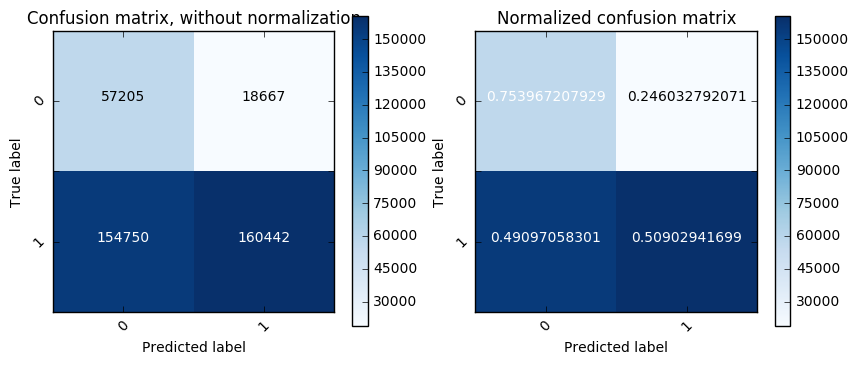

In [46]:
#use scikit-learn decision tree and set class_weight to handle the imbalance
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=1)
tree.fit(X, y)
y_pred = tree.predict(X)
#here we use scikit-learn's predict_proba for the input to ROC_AUC_SCORE
y_prob = tree.predict_proba(X)
evaluate(y, y_pred, y_prob[:,1])

cpt_cnf(tree, X, y)

With the "balanced" option, scikit-learn decision tree has set a threshold so that the prediction accuracies of the two classes to be more comparable.

In [47]:
graph = print_tree(tree, ['grade'])
Image(graph.create_png())

AttributeError: type object '_io.StringIO' has no attribute 'StringIO'

The split chosen (1.5) corresponds to a boundary between grades B and C.

<font size=3><u> Baseline 3: Logistic Regression on Interest Rates</u> </font>

In [48]:
X = fulldf.int_rate

In [49]:
#Oversampling
#remove flutype)
X = np.reshape(X, (X.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))

print X.shape
print y.shape


X = np.concatenate((X, y), axis=1)
print X.shape

unq, unq_idx = np.unique(X[:, -1], return_inverse=True)
unq_cnt = np.bincount(unq_idx)
cnt = np.max(unq_cnt)
out = np.empty((cnt*len(unq) - len(X),) + X.shape[1:], X.dtype)
slices = np.concatenate(([0], np.cumsum(cnt - unq_cnt)))
for j in xrange(len(unq)):
    indices = np.random.choice(np.where(unq_idx==j)[0], cnt - unq_cnt[j])
    out[slices[j]:slices[j+1]] = X[indices]
out = np.vstack((X, out))


data_oversamp = out
print data_oversamp.shape

x_oversamp = data_oversamp[: , :-1]
y_oversamp = data_oversamp[: , -1]


x_train, x_test, y_train, y_test = train_test_split(x_oversamp, y_oversamp, test_size=0.2)
print x_train
#print x_train[:, -1].mean()
print y_train.mean()

#print sum(x_train_ovr[:, -1]-y_train_ovr)

(391064, 1)
(391064, 1)
(391064, 2)
(630384, 2)
[[ 0.1]
 [ 0.1]
 [ 0.2]
 ..., 
 [ 0.1]
 [ 0.1]
 [ 0.1]]
0.499882016311


Overall Accuracy: 0.626498092436
F1 Score: 0.638425627323
F1 Score (0 as "positive" since we are looking for "Default" cases): 0.613756787349
Weighted average F1 Score: 0.626102849396
Micro average F1 Score: 0.626498092436
Macro average F1 Score: 0.626091207336
Class 0 Accuracy: 0.594071039553
Class 1 Accuracy: 0.65886398935
ROC AUC Score: 0.67756368254
[[37414 25565]
 [21525 41573]]


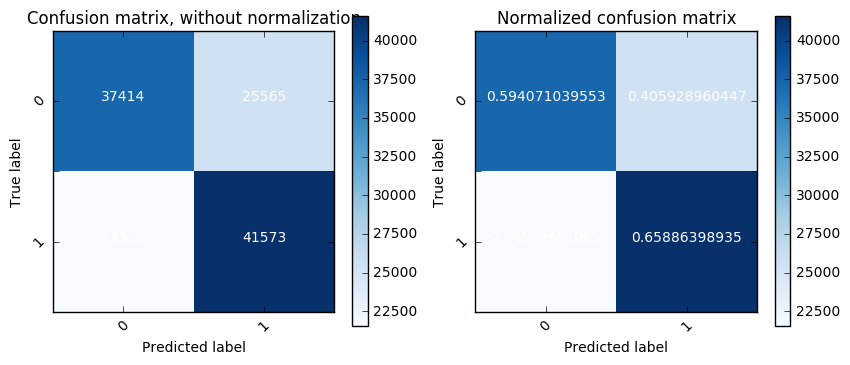

In [50]:
#Logistic Regresstion
LOG_ = LogisticRegression(C = 1000000) #C=1000000,penalty='l1'
model_LOG = LOG_.fit(x_train, y_train)
y_pred = LOG_.predict(x_test)
y_prob = LOG_.predict_proba(x_test)

evaluate(y_test, y_pred, y_prob[:, 1])
cpt_cnf(model_LOG, x_test, y_test)

### Model Overview/Comparison

**!!(Insert Model Comparisons - Pros, Cons, Hypothesis, Previous Research)!!**

### Evaluation Criteria

**!!(INSERT EVALUATION CRITERIA WRITEUP)!!**

In [51]:
y = fulldf["loan_status"].values
df_for_drop = fulldf
X_full = df_for_drop.drop("loan_status", axis=1)
x = X_full.values
print X_full.shape
print y.shape
print x

(391064, 108)
(391064,)
[[15000.0 15000.0 15000.0 ..., 53397.0 36100.0 47370.0]
 [15000.0 15000.0 15000.0 ..., 27849.0 28200.0 21124.0]
 [25000.0 25000.0 25000.0 ..., 68056.0 38400.0 82117.0]
 ..., 
 [10000.0 10000.0 10000.0 ..., 10170.0 5600.0 6974.0]
 [22000.0 22000.0 22000.0 ..., 47136.0 12200.0 39347.0]
 [2000.0 2000.0 2000.0 ..., 50896.0 47500.0 37200.0]]


In [52]:
for col in fulldf:
    print fulldf[col].unique()

[ 15000.  25000.  18000. ...,  34425.  32125.  33775.]
[ 15000.  25000.  18000. ...,  34425.  32125.  33775.]
[ 15000.   25000.   18000.  ...,  20375.7  22962.   33650. ]
[36 months, 60 months]
Categories (2, object): [36 months, 60 months]
[ 0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.2  0.1  0.1  0.2  0.2  0.2  0.1  0.1
  0.2  0.1  0.2  0.1  0.2  0.1  0.2  0.2  0.2  0.1  0.1  0.3  0.2  0.2  0.3
  0.3  0.3  0.2  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.3  0.1  0.1  0.1  0.1
  0.2  0.2  0.2  0.1  0.2  0.2  0.1  0.2  0.2  0.3  0.2  0.1  0.3  0.3  0.3
  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.1  0.2  0.1  0.2  0.1
  0.1  0.2  0.3  0.2  0.1  0.1  0.2  0.1  0.2  0.2  0.2  0.1  0.3  0.3  0.3
  0.3  0.3  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.2  0.2  0.1  0.1  0.2  0.2
  0.1  0.1  0.2  0.1  0.1  0.2  0.2  0.1  0.1  0.2  0.2  0.1  0.2  0.1  0.1
  0.1  0.2  0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.1  0.2  0.2  0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.2  0.2

In [53]:
# Get DF of All Numerical Inputes
cols = X_full.columns
for col in cols:
    if X_full[col].dtype != "float64":
        x_numeric = X_full.drop(col, axis=1)

In [54]:
# Get DF of all Non-Numeric Predictors
for col in cols:
    if X_full[col].dtype == "float64":
        x_alpha = X_full.drop(col, axis=1)

In [55]:
### !!!! WARNING !!!! ### LOOP CRASHES KERNAL

In [56]:
# Pandas One Hot Encoding #

In [57]:
cols = x_alpha.columns      
#Create DF With All Predictors Encoded
x_expanded = x_numeric
for col in cols:
    col_series = pd.get_dummies(x_alpha[col])
    x_expanded = pd.concat([x_expanded, col_series], axis=1)
    
print x_expanded.shape

MemoryError: 

In [ ]:
# SKLearn One Hot Encoding #

In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(x_alpha)  
OneHotEncoder(categorical_features='all', handle_unknown='error', n_values='auto', sparse=False)
enc.n_values_
enc.feature_indices_
#enc.transform().toarray()


ValueError: cannot convert float NaN to integer

In [ ]:
cols = x_alpha.columns      
#Create DF With All Predictors Encoded
x_expanded = x_numeric
for col in cols:
    col_series = pd.get_dummies(x_alpha[col])
    x_expanded = pd.concat([x_expanded, col_series], axis=1)
    
print x_expanded.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_expanded, y, test_size=0.2)

# V. Standard Models

### (1) Logistic Regression

<font size=3><u> Overview</u> </font>

We first modeled defaults using logistic regression to learn more about the data features and get the basic performance of our prediction. To first get boundaries of iterations needed for Newton as well as understand predictive contribution from each data features, we trial-trained with a logistic classification on all features.

The training and test converges to an optimal solution within 5 iterations, and overall we reached a test accuracy of 92.9% and a test specificity of 75.8%.



In [ ]:
C = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300] %// you must choose your own set of values for the parameters that you want to test. You can either do it this way by explicitly typing out a list
S = 0:0.1:1 %// or you can do it this way using the : operator
fscores = zeros(numel(C), numel(S)); %// Pre-allocation
for c = 1:numel(C)   
    for s = 1:numel(S)
        vals = crossval(@(XTRAIN, YTRAIN, XVAL, YVAL)(fun(x_train, y_train, x_train, y_train, C(c), S(c)),input(trIdx,:),target(trIdx));
        fscores(c,s) = mean(vals);
    end
end

%// Then establish the C and S that gave you the bet f-score. Don't forget that c and s are just indexes though!
[cbest, sbest] = find(fscores == max(fscores(:)));
C_final = C(cbest);
S_final = S(sbest);

** !! INSERT FEATURE MODELS !!**

<font size=3><u> Bias Variance Tradeoff</u> </font>

To evaluation the tradeoff between bias and variance in our logistic model, we ran tested different sample sizes and charted the impact on accuracy:

<i>(a) Training vs. test errors</i>

** !! INSERT GRAPH !!**
Y-Axis = MSE
X-axis = Training Sample Size

<i> (b) Training vs. test specificity ** </i>

** !! INSERT GRAPH !!**
Y-Axis = Speceficity (# correct prediction / # actual defaults)
X-axis = Training Sample Size

The test and training error converged **!!(with a sample size >= 5,000)!!** and we see that we may have **!!(a high bias problem as increasing sample size still resulted in a >5% test error. From the sensitivity chart, however, we see that sensitivity fluctuates)**!! with additional sample size, suggesting that the default prediction might potentially benefit from filtering on existing features even though test error has stabilized.

<font size=4><u> Feature Selection</u> </font>

In exploring the dataset, we ran a logistic model on each each available predictor. We found that for prediction on default rate (specificity), the credit score for the borrower is the most predicative of all features, followed by borrower population; while interest rate has a negative impact as the number was subject to sporadic adjustment from Lending Club, and fields like loan description or borrower’s lower fico range, where there are a lot of zero values, would worsen the default prediction. After we filtered out features that decreased our test specificity, such as last_fico_range_low, installment, open_acc, desc, int_rate, we managed to bump specificity from **!!(75.8% to 77.1%)!!** without hurting overall test accuracy.

Data From: http://cs229.stanford.edu/proj2015/199_report.pdf

In [ ]:
Drop above columns

** Table 1: Performance of Logistic Model with feature selection **

Num Newton Accu Prec Sens Spec G-mean
30 Iterations 92.8 96.6 95.1 77.1 85.7

### (2) Native Bayes

<font size=3><u> Overview</u> </font>

**!! Native Bayes (Gaussian, Bernoulli, and Multinomial) | Laplace Smoothing = 1 !!**

We used a Laplace smoothing factor of 1 and ran Naive Bayes using Gaussian, Bernoulli, and Multinomial probability distributions.

For Bernoulli Naive Bayes, where we require boolean feature values, we binarized the features and values. Multinomial probability distributions take discrete feature values, so we rounded any decimal feature values to the closest integers.

In [ ]:
Distribution Accu Prec Sens Spec G-mean
Gaussian 91.1 96.6 92.7 80.4 86.3
Bernoulli 88.5 91.0 96.2 36.9 59.6
Multinomial 61.9 88.7 64.4 45.8 54.3

Gaussian Naive Bayes returns the most desirable performance on the test dataset. Bernoulli and Multinomial significantly underperformed Gaussian Naive Bayes.

<font size=3><u> Bias Variance Tradeoff</u> </font>

In order to determine whether we are seeing high bias or
high variance, we compare the training error to the test error
for each case of Naive Bayes.

In an effort to reduce the error rate for Gaussian Naive Bayes, an additional feature of median income by zip code and descriptions was included in the dataset. The test error for Gaussian Naive Bayes decreased from 8.94% to 8.64% (by 0.3%). However, specificity decreased from 80.4% to 80.1% with the external dataset included.

In [ ]:
Distribution Accu Prec Sens Spec G-mean
Gaussian 91.3 96.9 93.0 80.1 86.3

### (3) SVM

<font size=3><u> Overview</u> </font>

Since the training data is likely not linearly separable, and not guaranteed to be separable even in higher-dimensional feature spaces, we will use L1 (LASSO) regularization (soft margin SVM). 

For training data points (x(i), y(i)), the model is the result of the optimization:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d9e948f6526c060d6cd63bd27631e213113c0ecd" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; width:27.957ex; height:5.509ex;" alt="\min _{w\in \mathbb {R} ^{p}}{\frac {1}{n}}\|{\hat {X}}w-{\hat {Y}}\|^{2}+\lambda \|w\|_{1}">

First, in an effort to prevent features with larger numeric values (absolute value) from dominating features with smaller numeric values, we normalized the dataset by scaling the values of each feature to [-1, 1]. Furthermore, normalizion prevents numeric problems such as overflows in situations where kernel values involve the inner products of feature vectors, which is anticipated in this instance. 

Note: The same scaling factor was applied to both the training and test data. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_predictors)
scaler.fit(test_predictors)
scaled_data_train = scaler.transform(train_predictors)
scaled_data_test = scaler.transform(test_predictors)

In [ ]:
C = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300] %// you must choose your own set of values for the parameters that you want to test. You can either do it this way by explicitly typing out a list
S = 0:0.1:1 %// or you can do it this way using the : operator
fscores = zeros(numel(C), numel(S)); %// Pre-allocation
for c = 1:numel(C)   
    for s = 1:numel(S)
        vals = crossval(@(XTRAIN, YTRAIN, XVAL, YVAL)(fun(XTRAIN, YTRAIN, XVAL, YVAL, C(c), S(c)),input(trIdx,:),target(trIdx));
        fscores(c,s) = mean(vals);
    end
end

%// Then establish the C and S that gave you the bet f-score. Don't forget that c and s are just indexes though!
[cbest, sbest] = find(fscores == max(fscores(:)));
C_final = C(cbest);
S_final = S(sbest);

SVM has a degrading performance on highly imbalanced datasets [10], so we should experiment with balancing the datasets as best as possible to improve SVM prediction.

<font size=3><u>Balancing The Dataset</u> </font>

<font size=3><u>Opitiization</u> </font> 

SVM model performance depends on three inputs: the kernel, the kernel parmeters, and the soft margin parameter C. We attempted to optimize each of these values. 

#### Kernal Selection

We investigate some commonly used kernels (linear, polynomial, Gaussian radial basis function, and sigmoid) and compare performance. We used LibSVM [8] with default settings (C-SVC, C = 1, γ = 1/# of features, d = 3), and trained the model with the first 70% of the loans and tested the models on the last 30% of the loans in our dataset.

Linear: $K(x, z) = x^Tz$ <br>
Polynomial: $K(x, z) = (γ(x^Tz + 1))^d$ <br>
RBF: $K(x, z) = e^(−γ||x−z||^2)$ <br>
Sigmoid: $K(x, z) = tanh(γx^Tz + d)$ <br>

**!!(SVM Results #1)!!**

In [ ]:
Kernel Accu Prec Sens Spec G-mean
Linear 93.0 96.6 95.3 77.7 86.1
Polynomial 93.0 94.5 97.6 61.8 77.7
RBF 92.8 93.9 98.0 57.5 75.1
Sigmoid 90.8 91.8 98.2 41.0 63.5

**!!(Baseline Model #1)!!**, which merely predicts every loan to be non-defaulting, achieves an accuracy of 87.0%, which is the fraction of test data that are actually positive, so we see that SVM improves predictions.

<font size=3><u> Bias Viariance Tradeoff</u> </font>

In [ ]:
** !! INSERT FEATURE MODELS !!**
Y-Axis = MSE
X-axis = Training Sample Size

We run SVM with a linear kernel with variable number of training examples, then compare the training error with the test error to determine whether we are likely to be encountering high bias or high variance in our SVM model with the dataset that we have.

The test and training errors converge quickly relative to the number of training examples available, and the gap between them is small, suggesting a high bias in the model. Thus we will increase the number of features by expanding zip code into census data, as well as identifying important words in the loan title and description. Adding median income, mean income, and population fields extrapolated from the zip code, we see a minute 0.1% increase in precision and 0.2% increase in specificity, with all other performance metrics remaining the same. Adding the words selected via TF-IDF as boolean features, we see an increase across all performance metrics, including a 0.6% boost in G-mean.

<font size=3><u>Soft Margin Parameters</u> </font> 

We experimented with different values of the soft margin parameter C. We ran linear kernel SVM with $C ={10^−6, 10^−4, 10^−2, 1, 10^2}$. Ultimately, we found that using **!!($C = 1$)!!** yielded the best performance.

### (4) Random Forest

<font size=3><u> Overview</u> </font>

**!!(Train On Precision))!!**

In [ ]:
rf = ensemble.RandomForestClassifier(n_jobs=-1,n_estimators=50,oob_score=True,max_depth=6)
# set the various grid params to consider for tuning
param_grid = {
   'n_estimators': [500,700,1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'oob_score' :[True,False],
   'max_depth' :[5,10,20,50,100,200],
   'min_samples_leaf' : [1,10,20,50,100]
}
rf_cv = grid_search.GridSearchCV(n_jobs=2, estimator=rf, param_grid=param_grid, cv= 5)
rf_cv.fit(train_predictors, train_labels)
# Calculate the Best Random Forest Score
rf = ensemble.RandomForestClassifier(n_jobs=-1,
                                    max_features=rf_cv.best_params_['max_features'],
                                    n_estimators=rf_cv.best_params_['n_estimators'],
                                    oob_score=rf_cv.best_params_['oob_score'],
                                    max_depth=rf_cv.best_params_['max_depth'],
                                    min_samples_leaf=rf_cv.best_params_['min_samples_leaf']
                                   )
rf.fit(train_predictors, train_labels)


In [ ]:
%# read some training data
[labels,data] = libsvmread('./heart_scale');

%# grid of parameters
folds = 5;
[C,gamma] = meshgrid(-5:2:15, -15:2:3);

%# grid search, and cross-validation
cv_acc = zeros(numel(C),1);
    for i=1:numel(C)
cv_acc(i) = svmtrain(labels, data, ...
                sprintf('-c %f -g %f -v %d', 2^C(i), 2^gamma(i), folds));
end

In [ ]:
C = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300] %// you must choose your own set of values for the parameters that you want to test. You can either do it this way by explicitly typing out a list
S = 0:0.1:1 %// or you can do it this way using the : operator
fscores = zeros(numel(C), numel(S)); %// Pre-allocation
for c = 1:numel(C)   
    for s = 1:numel(S)
        vals = crossval(@(XTRAIN, YTRAIN, XVAL, YVAL)(fun(XTRAIN, YTRAIN, XVAL, YVAL, C(c), S(c)),input(trIdx,:),target(trIdx));
        fscores(c,s) = mean(vals);
    end
end

%// Then establish the C and S that gave you the bet f-score. Don't forget that c and s are just indexes though!
[cbest, sbest] = find(fscores == max(fscores(:)));
C_final = C(cbest);
S_final = S(sbest);

# VI. Cost Based Models

<font size=3><u> Overview</u> </font>

<font size=3><u> Defining Cost</u> </font>

In [ ]:
def cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    cost_true_positive = 90
    cost_true_negative = -10
    cost_false_positive = -15010
    cost_false_negative = -10
        
    n_true_positive = sum([(pred_val == 1) & (true_val == 1) for true_val, pred_val in zip(y_true, y_pred)])
    n_true_negative = sum([(pred_val == 0) & (true_val == 0) for true_val, pred_val in zip(y_true, y_pred)])
    n_false_positive = sum([(pred_val == 0) & (true_val == 1) for true_val, pred_val in zip(y_true, y_pred)])
    n_false_negative = sum([(pred_val == 1) & (true_val == 0) for true_val, pred_val in zip(y_true, y_pred)])
            
    total_cost = (np.array([[cost_true_negative, cost_false_negative], [cost_false_positive, cost_true_positive]]) *
                  np.array([[n_true_negative, n_false_negative], [n_false_positive, n_true_positive]])).sum()
    
    return total_cost

In [ ]:
from sklearn.cross_validation import KFold

def cv_cost(model, n_folds, X, y):
    scores = pd.DataFrame({"class":["all"] + list(np.unique(y)), "total":0, "correct":0, "score":0, "cost":0})
    scores.set_index("class", inplace=True)
    kf = KFold(len(X), n_folds=n_folds, shuffle=True, random_state=0)
    for train_index, test_index in kf:
        train_X, test_X = X[train_index, :], X[test_index, :]
        train_y, test_y = y.ravel()[train_index], y.ravel()[test_index]  
        
        model.fit(train_X, train_y)
        
        for cls in np.unique(y):
            pred_y = model.predict(test_X[test_y==cls])

            n_correct = sum(pred_y == cls)
            n_total = sum(test_y==cls)
        
            cost_amt = cost(pred_y, [cls] * len(pred_y))
            scores.loc[cls, "correct"] += n_correct
            scores.loc[cls, "total"] += n_total
            scores.loc[cls, "cost"] += cost_amt
            scores.loc["all", "correct"] += n_correct
            scores.loc["all", "total"] += n_total
            scores.loc["all", "cost"] += cost_amt

    scores.score = scores.correct / scores.total
    return scores

<font size=3><u> Evaluation</u> </font>

In [ ]:
# Baseline models
# All positive (label every loan as safe)
class Pos_model(object):
    def fit(self, X, y):
        return
    
    def predict(self, x):
        return np.array([1] * len(x))
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

pos_model = Pos_model()
cv_cost(pos_model, 5, X, y)

In [ ]:
# All negative (label every loan as risky)
class Neg_model(object):
    def fit(self, X, y):
        return
    
    def predict(self, x):
        return np.array([0] * len(x))
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

neg_model = Neg_model()
cv_cost(neg_model, 5, X, y)

In [ ]:
# Random (randomly predict safe or risky)
class Random_model(object):
    def fit(self, X, y):
        return
    
    def predict(self, x):
        return np.random.randint(0, 2, len(x))
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

random_model = Random_model()
cv_cost(random_model, 5, X, y)

In [ ]:
#import quandl

#state_list = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
#                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
#                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
#                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
#                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
#                                             "WY"]
#state_unemployment_data = {}
#for i in state_list:
#    try:
#        print(i)
#        result = quandl.get('FRED/{:s}UR'.format(i))
#        state_unemployment_data[i] = result
#    except RuntimeError as e:
#        print(e)

#check all indices are sorted by date
#for s in state_unemployment_data.keys():
#    if not state_unemployment_data[s].index.is_monotonic:
#        print s

#convert percentages to a value in the range [0, 1]
#for s in state_unemployment_data.keys():
#    state_unemployment_data[s]['VALUE'] = state_unemployment_data[s]['VALUE'] / 100.0

#import pickle
#with open('unemployment_rates_by_state.pkl', 'wb') as f:
#    pickle.dump(state_unemployment_data, f)

In [ ]:
import pickle
with open('unemployment_rates_by_state.pkl', 'rb') as f:
    state_unemployment_data = pickle.load(f)

In [ ]:
state_unemployment_data['AK'].tail()

In [ ]:
def unemp_rate(row):
    try:
        state = row.addr_state
        date = pd.to_datetime(row.last_pymnt_d.strftime('%Y-%m'), format='%Y-%m')
        result = state_unemployment_data[state][date:].iloc[0]
    except:
        result = np.NaN
    return result

In [ ]:
#add 1 extra column ('state_unemp_rate') to the data frames

#this is taking a long time to run (10 mins on my computer - Ben)

print 'data'
data['state_unemp_rate']=data.apply(unemp_rate, axis=1)
print 'data_2007_2011'
data_2007_2011['state_unemp_rate']=data_2007_2011.apply(unemp_rate, axis=1)
print 'data_2014'
data_2014['state_unemp_rate']=data_2014.apply(unemp_rate, axis=1)
print 'data_2015'
data_2015['state_unemp_rate']=data_2015.apply(unemp_rate, axis=1)

In [ ]:
#data_2007_2011 = data_2007_2011[data_2007_2011.columns[data.columns!='state_unemp_rate']]
#data_2014 = data_2014[data_2014.columns[data.columns!='state_unemp_rate']]
#data_2015 = data_2015[data_2015.columns[data.columns!='state_unemp_rate']]
#data = data[data.columns[data.columns!='state_unemp_rate']]

In [ ]:
data.head()

# VII. Results

After comparing each model, we found that **!!(Naive Bayes with Gaussian)!!** performs the best with default prediction **!!(80.1% sensitivity)!!**. We speculate that **!!(Naive Bayes with Gaussian)!!** is slightly better than the other models for 2 potential reasons:

- Naive Bayes model works well with independent feature sets [1], and the training features that we selected are possibly either independent or have evenly distributed dependencies.
- Some of the key features that we used, like credit scores and regional population, might be distributed in Gaussian, which would allow the Gaussian-assumption model to perform better.

Predicting default rates in isolation is intersting and can be valuable to individual, small time investors. However, the real commercial value of better performing default prediction models is **!!(Insert Conclusion)!!**.  As such, we calculated ROI as **!!(mentioned in Method section)!!**. Currently, the overall return from Lending Club (including interest and late fee earned and principal recovered) by all investors divided by their initial principal is **!!(10.1% [?])!!**. If we apply the model prediction to avoid investing on the predicted-to-default note and calculate the return based on only predicted-positive loans, we can increase the return on investment of the test set from **!!(10.1% to over 15.7% (50% growth))!!**.

# VIII. Conclusion

From the comparison of multiple models, including Logistic Regression, SVM, Naive Bayes, Random Forest, and **!!(new models)!!** and different fine-tuning mechanisms, we found that **!!(Naive Bayes with Guassian)!!** performs the best at predicting default rate (optimizing specificity). And by applying our best-performing model, we saw that the investment return from Lending Club can potentially grow by 50%. Some future work that could further improve the prediction includes:
- We see high-bias problems across all models, so the predictions could benefit from more features, such as stock market or housing trend, so as to include more macroeconomic factors into the models.
- Not all default cases are the same, and some late payments could still be recovered later on, so instead of a binary classification, multinomial predictions could be employed to take into account the different types of default so as to make a more granular prediction.

# Resources

[1]  Zhang, Harry. "The optimality of naive Bayes." AA 1.2 (2004): 3. <br>
[2] He, He, and Ali Ghodsi. "Rare class classification by support vector machine." Pattern Recognition (ICPR), 2010 20th International Conference on. IEEE, 2010. <br>